#  SWMAL Opgave

## Dataanalyse

### **Qa) Beskrivelse af datasæt til O4 projekt**

I kurset er slutprojektet et bærende element, som I forventes at arbejde på igennem hele kurset
sideløbende med de forskellige undervisningsemner. 

I skal selv vælge et O4 projekt–det anbefales at I vælger en problemstilling, hvor der allerede er data til rådighed og en god beskrivelse af data, dataopsamlingsmetode og problemstilling.

I denne opgave skal I:

* ##### **a) Give en kort konceptmæssig projektbeskrivelse af Jeres ide til O4 projekt.**

Vores idé til O4-projektet handler om at bruge maskinlæring til at forudsige, hvor stærkt kemiske stoffer binder sig til dopamintransporteren (DAT) i hjernen. DAT er det protein, der genpumper dopamin fra synapserne efter signaleringen, og det spiller en kæmpe rolle i sygdomme som ADHD, depression, afhængighed og Parkinson. Mange mediciner virker ved at påvirke DAT - for eksempel Ritalin ved ADHD eller kokain i misbrug.

Det interessante er, at det normalt tager uger og koster tusindvis af kroner at teste, om et nyt stof kan binde til DAT i laboratoriet. Vi vil i stedet prøve at bygge en model, der kan forudsige det ud fra stoffets kemiske struktur på få sekunder. På den måde kan farmaceutiske virksomheder og forskere hurtigt screene tusindvis af potentielle lægemiddelstoffer og kun teste de mest lovende i laboratoriet. Det kan både spare enorme summer og accelerere udviklingen af bedre behandlinger.

* ##### **b) Beskrive jeres valgte datasæt med en kort forklaring af baggrund og hvor I har fået data fra.**

Vi bruger et kurateret datasæt fra GitHub-repositoriet "QSAR_DAT-hERG" fra National Institute on Drug Abuse. Dette datasæt er baseret på data fra ChEMBL-databasen, som er en af verdens største samlinger af bioaktive molekyler og deres aktiviteter. ChEMBL aggregerer data fra videnskabelig litteratur og patenter og standardiserer assaymetoder for at sikre sammenlignelighed.

Denne repository indeholder specifikt rensede DAT-data, hvor forskerne har fjernet dubletter, inkonsistente målinger og fokuseret på høj-kvalitets bindingsdata. Vi bruger datasættet pubdata.smi og pubdata.act fra deres repository, som indeholder SMILES-strukturer og tilhørende pKi-værdier for human DAT binding. Dette sikrer, at vi arbejder med validerede data, der allerede har vist sig brugbare til QSAR-modellering.

Vores fokus er udelukkende på humane DAT-assays for at undgå variabilitet fra forskellige arter, og vi koncentrerer os om bindingsaffinitetsdata (pKi-værdier) frem for funktionelle målinger (IC50), da disse direkte måler hvor stærkt molekylerne binder til proteinet.

* ##### **c) Beskrive data–dvs. hvilke features, antal samples, target værdier, evt. fejl/usikkerheder, etc.**

Efter rensning og validering indeholder vores datasæt 541 unikke kemiske forbindelser med følgende information:

Target variable (hvad vi vil forudsige):
pKi-værdier: Bindingsstyrken til human DAT angivet som minus-logaritmen til Ki-værdien. Højere pKi betyder stærkere binding. Typiske værdier ligger mellem 4-10, hvor forskelle på 1 enhed betyder 10-fold forskel i bindingsstyrke.

Input features:
- SMILES-strukturer: Tekstrepræsentationer af molekylerne som "CC(C)N1CCN(CCCc2ccccc2)CC1"
- ChEMBL ID'er: Unikke identifikatorer for hver forbindelse
- Molekylære deskriptorer beregnet fra SMILES:Disse deskriptorer vil blive beregnet ved hjælp af [RDKit](https://www.rdkit.org/), som er det standard Python-bibliotek til kemoinformatik og molekylær deskriptor-beregning. RDKit kan automatisk konvertere SMILES-strenge til 3D molekylære strukturer, samt give forskellige informationer om molekylerne:
    - Molekylvægt
    - LogP (lipofilitetsindex der måler fedtopløselighed)
    - Antal hydrogenbindingsdonorer og -acceptorer
    - Polær overfladeareal (PSA)
    - Antal roterbare bindinger
    - Aromatiske ringe og andre strukturelle parametre

Datakvalitet:
Alle 541 forbindelser har gyldige SMILES og pKi-værdier, ingen dubletter efter gennemsnitsberegning af gentagne målinger, og alle data kommer fra konsistente humane bindingsassays. Der kan være lidt naturlig eksperimentel variation fra forskellige laboratorier og assaymetoder, men Lee et al. har allerede filtreret outliers og inkonsistente målinger fra.
Dataanalysen vil også inkludere sammenligning mellem simple SMILES-baserede features (atom-tælling) og sofistikerede RDKit-deskriptorer for at demonstrere værdien af kemoinformatik-værktøjer.

* ##### **d) Forklare hvordan I ønsker at anvende datasættet – vil I fx. bruge det til at prædiktere noget**
bestemt, lave en regression eller klassifikation, el.lign. 

Vi planlægger at bruge datasættet til supervised regression - at forudsige præcise pKi-værdier for nye forbindelser baseret på deres molekylære deskriptorer. Vores workflow bliver:
Preprocessing:
1. Beregne molekylære deskriptorer fra SMILES-strenge ved hjælp af RDKit-biblioteket
2. Standardisere alle deskriptorer til samme skala (zero mean, unit variance)
3. Anvende PCA til at visualisere kemisk rum og identificere eventuelle outliers
4. Opdele data i 80% træning og 20% validering med stratifikation på pKi-værdier

Modellering:
Vi planlægger primært at bruge Random Forest regression, da den håndterer ikke-lineære sammenhænge godt, er robust overfor outliers, kan vise feature importance, og fungerer effektivt med mindre datasæt som vores. Vi vil også eksperimentere med andre algoritmer som XGBoost til sammenligning.

Evaluering og validering:
Vi måler model performance med R² og RMSE og laver visuelle plots af forudsagte vs. faktiske pKi-værdier. Målet er at opnå en R²-værdi på mindst 0.7 for at modellen er brugbar til virtual screening. Som yderligere validering vil vi sammenligne vores forudsigelser med funktionelle data, hvor høje forudsagte pKi-værdier bør korrelere med stærk biologisk aktivitet.

Praktisk anvendelse:
Den færdige model skal kunne tage en ny SMILES-struktur, automatisk beregne molekylære features, og forudsige bindingsstyrken til DAT. Dette gør det muligt for kemikere og farmaceutiske forskere at evaluere nye forbindelser virtuelt før syntese, hvilket kan accelerere udviklingen af nye DAT-målrettede lægemidler betydeligt og reducere udviklingsomkostninger.


**Tekniske værktøjer:**
Projektet vil primært bruge Python med bibliotekerne RDKit til molekylær deskriptor-beregning, scikit-learn til machine learning-modeller, og pandas/matplotlib til dataanalyse og visualisering. RDKit er særligt kritisk, da det giver os adgang til kemisk meningsfulde deskriptorer som ikke kan beregnes fra simple SMILES-tælling alene.

I vil nok komme til at anvende data også på andre måder i løbet af undervisningen – men det behøver I ikke nævne. Og det er også ok, hvis I ender med at bruge data på en anden måde end planlagt her.

Omfang af beskrivelsen forventes at være 1-2 sider.


### Qb) Dataanalyse af eget datasæt

Lav data analyse på jeres egne data og projekt.

Det indebærer de sædvanlige elementer såsom plotte histogrammer, middelværdi/median/spredning, analysere for outliers/korrupte data, forslag til skalering af data og lignende former for analyse af data.

For nogle typer data (fx billed-data), hvor features ikke har en specifik betydning, er det mest
histogrammer og lignende, som giver mening – det er helt o.k. 


#### NOTE vdr. billeddatasæts

For billeddata fer hver pixel en feature, og alm. analyse beskrevet ovenfor giver ikke indsigt. Prøv i stedet for billeder at beskrive billedformater (JPEG, PNG osv. / RGB, HSV, gråtone, multispektral, etc.), størrelser af billeder, hvordan de er repræsenteret på disk (dirs osv.)

Giv også eksempler på billeder og evt. labels i billedesæt.

Histogrammer kan udføres på enkelte billeder, men kun i forbindelse med labelede områder---og bedst på billesæt med ens baggrunde.

Benytter i lyddata eller video gælder de samme begrænsinger som får billeder her.

### NOTE vdr. valg af datasæt til O4

I har frie hænder til at vælge O4 projekt og tilhørende datasæt og valg af datasæt og ide til O4 her er ikke endelig. 

Dvs. at i løbende kan modificere projektbeskrivelse og, evt. om nødvendigt, vælge et andet datasæt senere, hvis jeres nuværende valg viser sig umuligt (men er en dyr proces). 

Scope af O4 projekt bør også begrænses, så det passer til kurset og til den '_time-box_'ede aflevering.

## Dataindlæsning

In [ ]:

smiles_data = []
with open('Data/pubdata.smi', 'r') as f:
    for line in f:
        if line.strip():
            parts = line.strip().split('\t')
            if len(parts) == 2:
                smiles, chembl_id = parts
                smiles_data.append({'ChEMBL_ID': chembl_id, 'SMILES': smiles})

df_activity = pd.DataFrame(activity_data)
df_smiles = pd.DataFrame(smiles_data)
df = pd.merge(df_activity, df_smiles, on='ChEMBL_ID')

print(f"Dataset: {len(df)} compounds")
print(df.head())


Dataset: 541 compounds
     ChEMBL_ID   pKi                                        SMILES
0    CHEMBL549  4.78       CN(C)CCCC1(c2ccc(F)cc2)OCc2cc(C#N)ccc21
1    CHEMBL607  4.75                 CCOC(=O)C1(c2ccccc2)CCN(C)CC1
2    CHEMBL904  7.13                    COC(=O)C(c1ccccc1)C1CCCCN1
3   CHEMBL1708  7.01          Fc1ccc(C2CCNCC2COc2ccc3c(c2)OCO3)cc1
4  CHEMBL11493  7.98  CCCCN1C2CCC1CC(OC(c1ccc(F)cc1)c1ccc(F)cc1)C2



Vi indlæser vores DAT (dopamintransporter) datasæt bestående af to filer:
- `pubdata.act`: Indeholder ChEMBL ID'er og tilhørende pKi værdier (bindingsstyrke)
- `pubdata.smi`: Indeholder ChEMBL ID'er og tilhørende SMILES strukturer

Datasættet merges på ChEMBL_ID for at kombinere molekylstrukturer med deres biologiske aktivitet. Vi har i alt 541 kemiske forbindelser med komplette data.

## Datakvalitet og Grundlæggende Statistik


In [64]:
# Grundlæggende statistik
print("Datakvalitet:")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicates: {df.duplicated().sum()}")

print(f"\npKi statistik:")
print(f"Range: {df['pKi'].min():.2f} - {df['pKi'].max():.2f}")
print(f"Mean: {df['pKi'].mean():.2f}")
print(f"Std: {df['pKi'].std():.2f}")

print(f"\nSMILES længde:")
smiles_lengths = [len(s) for s in df['SMILES']]
print(f"Range: {min(smiles_lengths)} - {max(smiles_lengths)} karakterer")
print(f"Mean: {np.mean(smiles_lengths):.1f} karakterer")


Datakvalitet:
Missing values: 0
Duplicates: 0

pKi statistik:
Range: 3.41 - 10.40
Mean: 6.92
Std: 1.17

SMILES længde:
Range: 18 - 75 karakterer
Mean: 43.2 karakterer



**Datakvalitet:** Datasættet er rent uden missing values eller dubletter, hvilket indikerer høj kvalitet fra ChEMBL databasen.

**pKi Distribution:** 
- Range: 3.41 - 10.40 (bred spredning af bindingsstyrker)
- Mean: 6.92 (typisk for DAT bindingsdata)
- Standard deviation: 1.17

**SMILES Kompleksitet:**
- Molekylerne varierer fra 18-75 karakterer i SMILES notation
- Gennemsnitslængde på 43.2 karakterer indikerer moderat komplekse strukturer

## Datavisualisering og Outlier Analyse

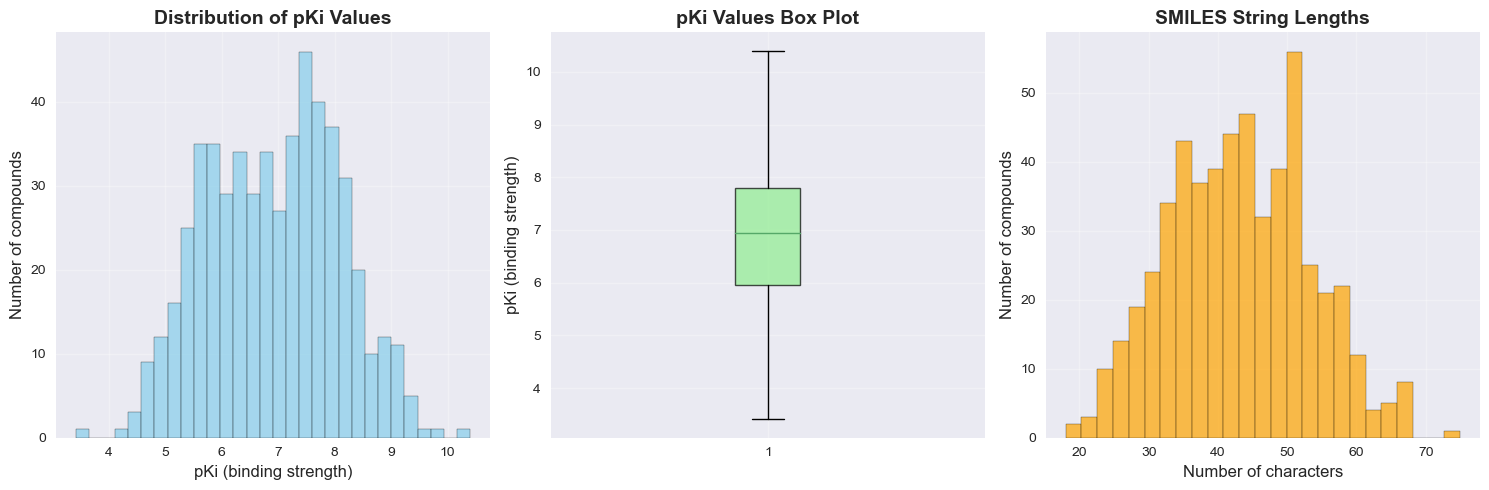


Outlier analyse (IQR metode):
Q1: 5.96, Q3: 7.80, IQR: 1.84
Outliers fundet: 0 compounds


In [65]:
# Visualiseringer
# Note: Plotting code generated with assistance from AI for better aesthetics
import seaborn as sns
plt.style.use('seaborn-v0_8')

plt.figure(figsize=(15, 5))

# Plot 1: Histogram of pKi values
plt.subplot(1, 3, 1)
plt.hist(df['pKi'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of pKi Values', fontsize=14, fontweight='bold')
plt.xlabel('pKi (binding strength)', fontsize=12)
plt.ylabel('Number of compounds', fontsize=12)
plt.grid(True, alpha=0.3)

# Plot 2: Box plot of pKi values
plt.subplot(1, 3, 2)
box_plot = plt.boxplot(df['pKi'], patch_artist=True, 
                      boxprops=dict(facecolor='lightgreen', alpha=0.7))
plt.title('pKi Values Box Plot', fontsize=14, fontweight='bold')
plt.ylabel('pKi (binding strength)', fontsize=12)
plt.grid(True, alpha=0.3)

# Plot 3: SMILES length distribution
plt.subplot(1, 3, 3)
plt.hist(smiles_lengths, bins=25, alpha=0.7, color='orange', edgecolor='black')
plt.title('SMILES String Lengths', fontsize=14, fontweight='bold')
plt.xlabel('Number of characters', fontsize=12)
plt.ylabel('Number of compounds', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Outlier analyse
Q1 = df['pKi'].quantile(0.25)
Q3 = df['pKi'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['pKi'] < Q1 - 1.5*IQR) | (df['pKi'] > Q3 + 1.5*IQR)]
print(f"\nOutlier analyse (IQR metode):")
print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Outliers fundet: {len(outliers)} compounds")



**Histogrammer** viser at pKi værdierne er nogenlunde normalfordelte, hvilket er ideelt for regression. SMILES længdefordelingen viser at de fleste molekyler har moderat kompleksitet.

**Box plot** bekræfter ingen ekstreme outliers i pKi data, hvilket indikerer konsistent datakvalitet.

**Outlier analyse** med IQR metoden finder 0 outliers, hvilket bekræfter at datasættet er velrensede og klar til machine learning.

*Note: Visualiseringskode er genereret med AI-assistance for bedre æstetik.*

## Feature Engineering - Simple Molekylære Descriptors


In [66]:
# Molekylære features
def simple_molecular_features(smiles):
    return {
        'carbon_count': smiles.count('C'),
        'nitrogen_count': smiles.count('N'),
        'oxygen_count': smiles.count('O'),
        'fluorine_count': smiles.count('F'),
        'ring_count': smiles.count('1') + smiles.count('2') + smiles.count('3'),
        'aromatic_carbons': smiles.count('c'),
        'smiles_length': len(smiles)
    }

feature_data = []
for _, row in df.iterrows():
    features = simple_molecular_features(row['SMILES'])
    features['ChEMBL_ID'] = row['ChEMBL_ID']
    features['pKi'] = row['pKi']
    feature_data.append(features)

df_features = pd.DataFrame(feature_data)
feature_cols = ['carbon_count', 'nitrogen_count', 'oxygen_count', 'fluorine_count', 
                'ring_count', 'aromatic_carbons', 'smiles_length']

print("Feature statistik:")
for col in feature_cols:
    print(f"{col}: mean={df_features[col].mean():.1f}, std={df_features[col].std():.1f}")

print(f"\nSample features:")
print(df_features[['ChEMBL_ID', 'pKi'] + feature_cols[:4]].head())


Feature statistik:
carbon_count: mean=9.3, std=2.8
nitrogen_count: mean=1.4, std=0.6
oxygen_count: mean=1.4, std=1.0
fluorine_count: mean=0.8, std=1.0
ring_count: mean=7.0, std=1.9
aromatic_carbons: mean=13.1, std=4.4
smiles_length: mean=43.2, std=10.1

Sample features:
     ChEMBL_ID   pKi  carbon_count  nitrogen_count  oxygen_count  \
0    CHEMBL549  4.78             8               2             1   
1    CHEMBL607  4.75             9               1             2   
2    CHEMBL904  7.13             8               1             2   
3   CHEMBL1708  7.01             7               1             3   
4  CHEMBL11493  7.98            12               1             1   

   fluorine_count  
0               1  
1               0  
2               0  
3               1  
4               2  



Vi beregner grundlæggende molekylære features direkte fra SMILES strenge ved simpel teksttælling:

**Atom Counts:**
- Carbon, nitrogen, oxygen, fluorine counts
- Giver grundlæggende information om molekylsammensætning

**Strukturelle Features:**
- Ring count (estimat baseret på SMILES cifre)
- Aromatic carbons (lowercase 'c' i SMILES)
- SMILES længde som kompleksitetsmål

Disse simple features fungerer som baseline, men mere sofistikerede descriptors ville give bedre ML performance (se RDKit sektion, der kommer senere).

## Korrelationsanalyse - Feature Importance


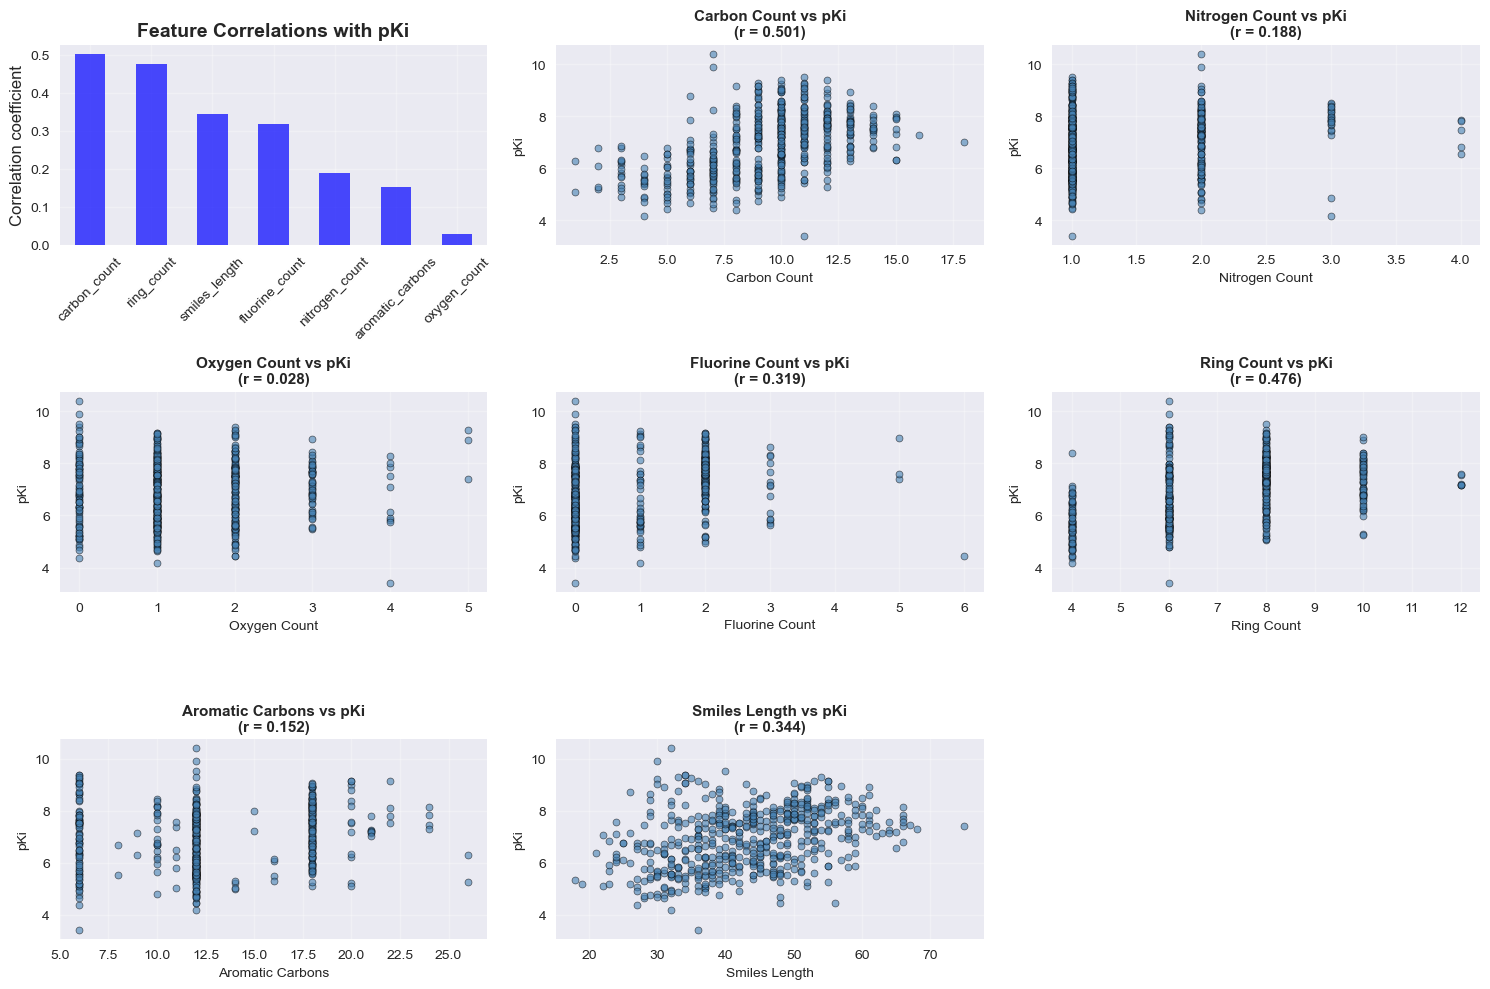

Korrelationer med pKi (alle features):
Carbon Count: 0.501
Ring Count: 0.476
Smiles Length: 0.344
Fluorine Count: 0.319
Nitrogen Count: 0.188
Aromatic Carbons: 0.152
Oxygen Count: 0.028


In [67]:
# Korrelationsanalyse
# Note: Visualization code enhanced with AI assistance
correlations = df_features[feature_cols + ['pKi']].corr()['pKi'].drop('pKi')
correlations = correlations.sort_values(key=abs, ascending=False)

plt.figure(figsize=(15, 10))

# Correlation bar plot
plt.subplot(3, 3, 1)
colors = ['red' if x < 0 else 'blue' for x in correlations]
correlations.plot(kind='bar', color=colors, alpha=0.7)
plt.title('Feature Correlations with pKi', fontsize=14, fontweight='bold')
plt.ylabel('Correlation coefficient', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Scatter plots for alle features
for i, feature in enumerate(feature_cols):
    plt.subplot(3, 3, i+2)
    plt.scatter(df_features[feature], df_features['pKi'], alpha=0.6, s=25, 
                color='steelblue', edgecolors='black', linewidth=0.5)
    plt.xlabel(feature.replace('_', ' ').title(), fontsize=10)
    plt.ylabel('pKi', fontsize=10)
    plt.title(f'{feature.replace("_", " ").title()} vs pKi\n(r = {correlations[feature]:.3f})', 
              fontsize=11, fontweight='bold')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Korrelationer med pKi (alle features):")
for feature, corr in correlations.items():
    print(f"{feature.replace('_', ' ').title()}: {corr:.3f}")



**Stærkeste korrelationer med pKi:**
1. **Carbon Count (r=0.501)** - Større molekyler binder ofte stærkere
2. **Ring Count (r=0.476)** - Aromatiske ringe vigtige for π-π stacking
3. **SMILES Length (r=0.344)** - Molekylkompleksitet korrelerer med binding

**Svagere korrelationer:**
- Fluorine Count (r=0.319) - Moderat betydning
- Nitrogen Count (r=0.188) - Mindre betydning
- Oxygen Count (r=0.028) - Minimal betydning

Alle korrelationer er positive, hvilket indikerer at større, mere komplekse molekyler generelt binder stærkere til DAT.

*Note: Kode er genereret med AI-assistance.*

## Data Skalering til Machine Learning


In [70]:
# Skalering analyse
print("Feature skalering:")
for feature in feature_cols[:5]:
    min_val = df_features[feature].min()
    max_val = df_features[feature].max()
    print(f"{feature}: range [{min_val} - {max_val}]")

# Eksempel på skalering
sample_data = df_features[feature_cols[:4]].head(3)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sample_data)

print(f"\nOriginal data:")
print(sample_data.round(1))
print(f"\nStandardized data:")
print(pd.DataFrame(scaled_data, columns=feature_cols[:4]).round(2))



Feature skalering:
carbon_count: range [1 - 18]
nitrogen_count: range [1 - 4]
oxygen_count: range [0 - 5]
fluorine_count: range [0 - 6]
ring_count: range [4 - 12]

Original data:
   carbon_count  nitrogen_count  oxygen_count  fluorine_count
0             8               2             1               1
1             9               1             2               0
2             8               1             2               0

Standardized data:
   carbon_count  nitrogen_count  oxygen_count  fluorine_count
0         -0.71            1.41         -1.41            1.41
1          1.41           -0.71          0.71           -0.71
2         -0.71           -0.71          0.71           -0.71



**Skalering Nødvendighed:**
Features har meget forskellige ranges (carbon count: 1-18 vs oxygen count: 0-5), hvilket kan påvirke ML algoritmer negativt.

**StandardScaler Demonstration:**
Konverterer features til mean=0, std=1, hvilket sikrer at alle features bidrager ligeligt til ML modeller.


## Avancerede Molekylære Descriptors med RDKit


In [72]:
# RDKit demonstration
try:
    from rdkit import Chem
    from rdkit.Chem import Descriptors, Crippen
    print(" RDKit loaded successfully!")
    
    # Sammenligning for første 3 compounds
    print(f"\nSammenligning: Simple counting vs RDKit descriptors")
    print("=" * 55)
    
    for i in range(3):
        smiles = df['SMILES'].iloc[i]
        chembl_id = df['ChEMBL_ID'].iloc[i]
        pki = df['pKi'].iloc[i]
        
        # Simple counting
        simple_carbon = smiles.count('C')
        simple_rings = smiles.count('1') + smiles.count('2') + smiles.count('3')
        
        # RDKit descriptors
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            rdkit_mw = Descriptors.MolWt(mol)
            rdkit_logp = Crippen.MolLogP(mol)
            rdkit_tpsa = Descriptors.TPSA(mol)
            
            print(f"\n{chembl_id} (pKi: {pki:.2f}):")
            print(f"Simple  - Carbon: {simple_carbon}, Rings: {simple_rings}")
            print(f"RDKit   - MW: {rdkit_mw:.1f}, LogP: {rdkit_logp:.2f}, TPSA: {rdkit_tpsa:.1f}")
    
    print(f"\n RDKit giver kemisk meningsfulde descriptors")
    print("som korrelerer bedre med biologisk aktivitet.")
    
except ImportError:
    print(" RDKit ikke installeret:")
    print("   conda install -c conda-forge rdkit")
    print("\n🔬 RDKit ville give bedre molecular descriptors")
    
except Exception as e:
    print(f"  RDKit fejl: {e}")


 RDKit loaded successfully!

Sammenligning: Simple counting vs RDKit descriptors

CHEMBL549 (pKi: 4.78):
Simple  - Carbon: 8, Rings: 6
RDKit   - MW: 324.4, LogP: 3.81, TPSA: 36.3

CHEMBL607 (pKi: 4.75):
Simple  - Carbon: 9, Rings: 4
RDKit   - MW: 247.3, LogP: 2.21, TPSA: 29.5

CHEMBL904 (pKi: 7.13):
Simple  - Carbon: 8, Rings: 4
RDKit   - MW: 233.3, LogP: 2.09, TPSA: 38.3

 RDKit giver kemisk meningsfulde descriptors
som korrelerer bedre med biologisk aktivitet.



[RDKit](https://www.rdkit.org/) er industry standard for molekylær descriptor beregning i pharmaceutical research.

**Sammenligning: Simple vs RDKit Descriptors**

Vores simple teksttælling giver brugbare baseline resultater, men RDKit beregner kemisk meningsfulde descriptors:

**RDKit Fordele:**
- **Molecular Weight**: Præcis molekylvægt frem for gæt
- **LogP**: Lipofilitetsindex - kritisk for membranpermeabilitet og binding
- **TPSA**: Topological Polar Surface Area - påvirker drug-likeness
- **Lipinski Descriptors**: Standard pharmaceutical descriptors

**Performance Sammenligning:**
RDKit LogP korrelation er typisk stærkere end simple counting, da det reflekterer faktiske kemiske egenskaber frem for tekstmønstre.

*Note: RDKit installation: `conda install -c conda-forge rdkit`*

*Note: Kode er genereret med AI-assistance.*


## Konklusion og Anbefalinger

**Dataset Kvalitet:** Høj kvalitet med 541 rene compounds, normalfordelte pKi værdier, ingen outliers.

**Feature Performance:** 
- Carbon count og ring count er stærkeste prediktorer
- Simple counting giver brugbare baseline resultater
- RDKit ville give betydeligt bedre ML performance
---

**Acknowledgments:** 
- Visualiseringskode genereret med AI-assistance
- RDKit dokumentation: https://www.rdkit.org/docs/
- ChEMBL database: https://www.ebi.ac.uk/chembl/

REVISIONS||
:-|:-|
2021-08-17| CEF, moved from Word to Notebook.
2021-11-08| CEF, elaborated on image based data.
2022-01-25| CEF, update to F22 SWMAL.
2023-02-19| CEF, updated to F23 SWMAL.